In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Seattle weather is the name of our dataset and we are going to build a model which will predict the weather. Let us understand the dataset.

In [2]:
df = pd.read_csv("seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# Columns are as follows:
Date: Shows the date.

Percipitation: All forms in which water falls on the land surface and open water bodies as rain, sleet, snow, hail, or drizzle

Temp_max: Maximum Temperature.

Temp_min: Minimum Temperature.

Wind: Wind Speed

Weather: What type of weather it is.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


# Description of the dataset

In [4]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


# Let us see the distribution of the weather column.

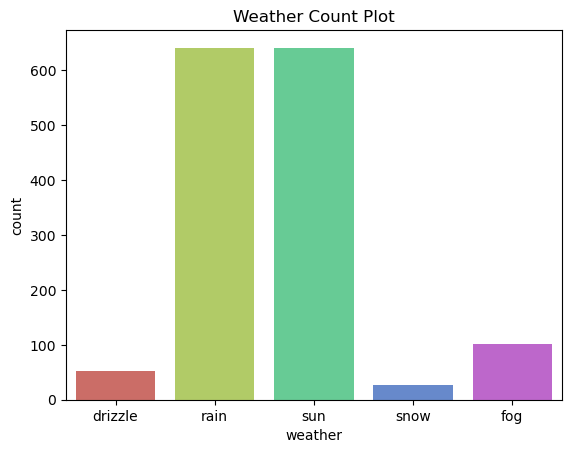

In [5]:
sns.countplot(x="weather", data=df, palette='hls')
plt.title('Weather Count Plot')
plt.show()

As we can see rain and sun are the most occured weather. 

# Now lets see the null values in the column

In [6]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

# Since there are no null values there is no need to clean the null values.

# Since we do not need the date column let us drop it.

In [7]:
df=df.drop(['date'],axis=1)

# Lets see the outliers in the dataset

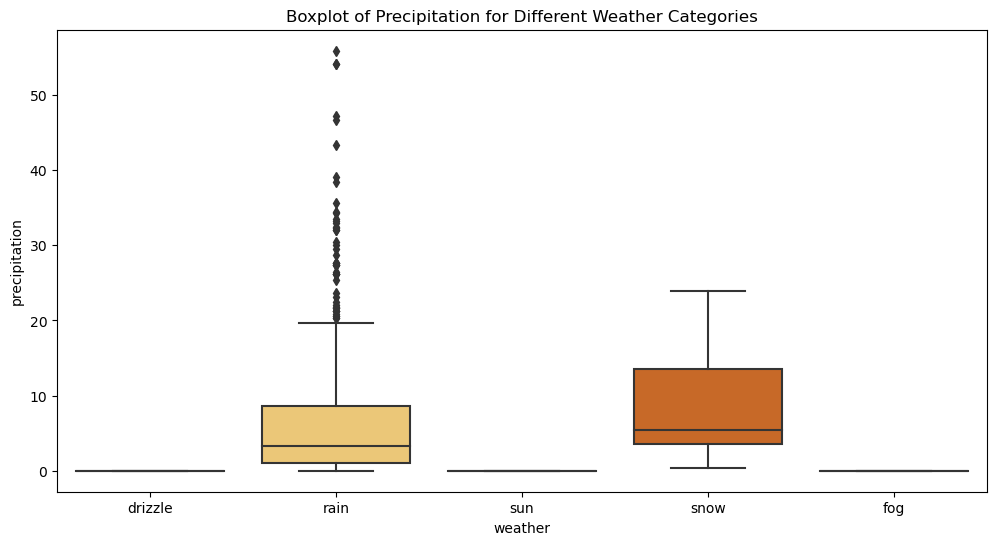

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='precipitation', data=df, palette='YlOrBr')
plt.title('Boxplot of Precipitation for Different Weather Categories')
plt.show()

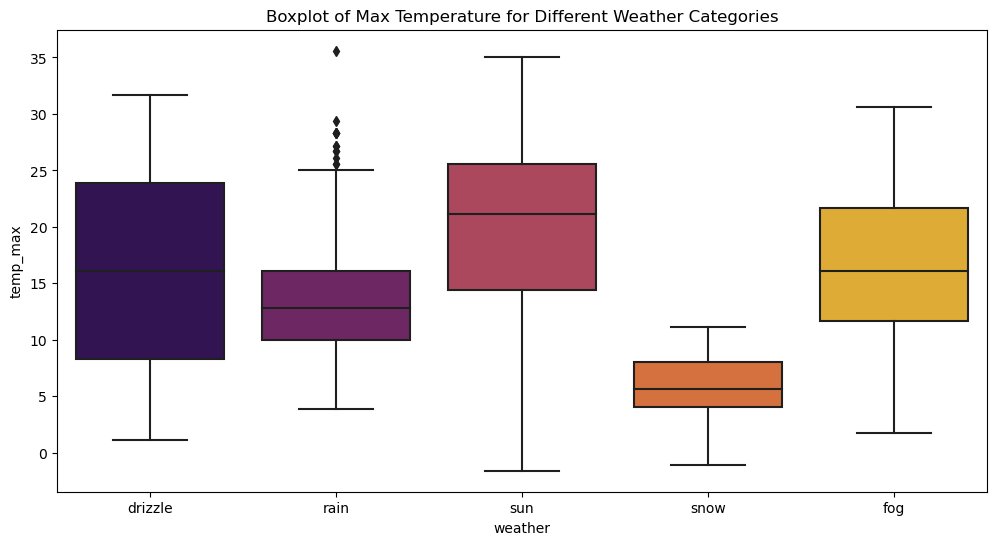

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='temp_max', data=df, palette='inferno')
plt.title('Boxplot of Max Temperature for Different Weather Categories')
plt.show()

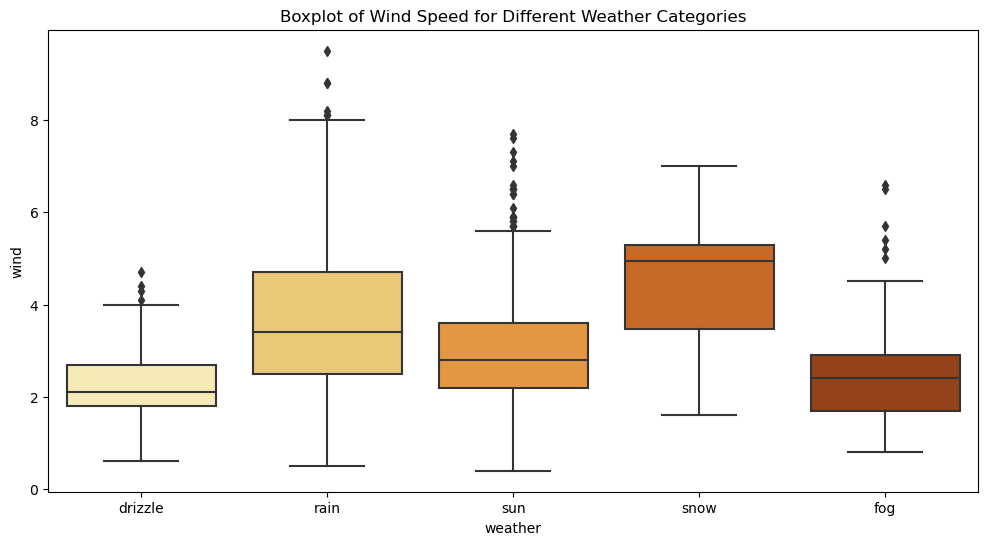

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='wind', data=df, palette='YlOrBr')
plt.title('Boxplot of Wind Speed for Different Weather Categories')
plt.show()

# As we can see there are a lot of outliers in the dataset, we need to clean it.

In [11]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

# Now its time to encode the target column since the machine takes in numeric values.

In [12]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [13]:
lc=LabelEncoder()
df['weather']=lc.fit_transform(df['weather'])

In [14]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
2,0.8,11.7,7.2,2.3,2
4,1.3,8.9,2.8,6.1,2
5,2.5,4.4,2.2,2.2,2
6,0.0,7.2,2.8,2.3,2


# Seperating the Features and Target columns

In [15]:
x=df.iloc[:,:-1]
y=df['weather']

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 1)

# Lets fit some classification models and hypertune it to see what model gives the best accuracy.

# Logistic Regression 

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [18]:
from sklearn.metrics import accuracy_score,classification_report
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.7894736842105263
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        22
           2       0.92      0.87      0.89        91
           3       0.00      0.00      0.00         7
           4       0.72      1.00      0.84       116

    accuracy                           0.79       247
   macro avg       0.33      0.37      0.35       247
weighted avg       0.68      0.79      0.72       247



# HPT

In [19]:
logreg = LogisticRegression(solver = "liblinear")
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [20]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.7894736842105263
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        22
           2       0.92      0.87      0.89        91
           3       0.00      0.00      0.00         7
           4       0.72      1.00      0.84       116

    accuracy                           0.79       247
   macro avg       0.33      0.37      0.35       247
weighted avg       0.68      0.79      0.72       247



In [21]:
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [22]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print("Accuracy score : ",ac)
print(cr)

Accuracy score :  0.7894736842105263
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        22
           2       0.92      0.87      0.89        91
           3       0.00      0.00      0.00         7
           4       0.72      1.00      0.84       116

    accuracy                           0.79       247
   macro avg       0.33      0.37      0.35       247
weighted avg       0.68      0.79      0.72       247



# KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [24]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,ypred)
print(ac)

0.708502024291498


In [25]:
for i in range(1,35):
    knn1 = KNeighborsClassifier(n_neighbors = i)
    knn1.fit(xtrain,ytrain)
    ypred = knn1.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 1 accuracy : 0.7004048582995951
max_depth = 2 accuracy : 0.6234817813765182
max_depth = 3 accuracy : 0.728744939271255
max_depth = 4 accuracy : 0.7125506072874493
max_depth = 5 accuracy : 0.708502024291498
max_depth = 6 accuracy : 0.7246963562753036
max_depth = 7 accuracy : 0.7165991902834008
max_depth = 8 accuracy : 0.7125506072874493
max_depth = 9 accuracy : 0.7206477732793523
max_depth = 10 accuracy : 0.7165991902834008
max_depth = 11 accuracy : 0.7125506072874493
max_depth = 12 accuracy : 0.6963562753036437
max_depth = 13 accuracy : 0.6963562753036437
max_depth = 14 accuracy : 0.7004048582995951
max_depth = 15 accuracy : 0.7044534412955465
max_depth = 16 accuracy : 0.7004048582995951
max_depth = 17 accuracy : 0.708502024291498
max_depth = 18 accuracy : 0.6963562753036437
max_depth = 19 accuracy : 0.7044534412955465
max_depth = 20 accuracy : 0.7125506072874493
max_depth = 21 accuracy : 0.7125506072874493
max_depth = 22 accuracy : 0.7125506072874493
max_depth = 23 accurac

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors = 9) 
knn2.fit(xtrain,ytrain)
ypred = knn2.predict(xtest)

In [27]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,ypred)
print(ac)

0.7206477732793523


# Decision Tree Classifier 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [29]:
dt = DecisionTreeClassifier()

In [30]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred))
    return model

In [31]:
mymodel(dt)

0.7327935222672065
              precision    recall  f1-score   support

           0       0.17      0.18      0.17        11
           1       0.33      0.23      0.27        22
           2       0.82      0.89      0.85        91
           3       1.00      0.57      0.73         7
           4       0.76      0.77      0.76       116

    accuracy                           0.73       247
   macro avg       0.62      0.53      0.56       247
weighted avg       0.72      0.73      0.73       247



DecisionTreeClassifier()

In [32]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.9959432048681541 
 test score : 0.7327935222672065


# HPT

# i. Max Depth

In [33]:
for i in range(1,35):
    dt1 = DecisionTreeClassifier(max_depth = i)
    dt1.fit(xtrain,ytrain)
    ypred = dt1.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 1 accuracy : 0.7935222672064778
max_depth = 2 accuracy : 0.805668016194332
max_depth = 3 accuracy : 0.8016194331983806
max_depth = 4 accuracy : 0.8137651821862348
max_depth = 5 accuracy : 0.8218623481781376
max_depth = 6 accuracy : 0.8178137651821862
max_depth = 7 accuracy : 0.7854251012145749
max_depth = 8 accuracy : 0.7692307692307693
max_depth = 9 accuracy : 0.7530364372469636
max_depth = 10 accuracy : 0.7692307692307693
max_depth = 11 accuracy : 0.7368421052631579
max_depth = 12 accuracy : 0.7327935222672065
max_depth = 13 accuracy : 0.7206477732793523
max_depth = 14 accuracy : 0.7368421052631579
max_depth = 15 accuracy : 0.7327935222672065
max_depth = 16 accuracy : 0.7165991902834008
max_depth = 17 accuracy : 0.7368421052631579
max_depth = 18 accuracy : 0.728744939271255
max_depth = 19 accuracy : 0.708502024291498
max_depth = 20 accuracy : 0.7004048582995951
max_depth = 21 accuracy : 0.728744939271255
max_depth = 22 accuracy : 0.728744939271255
max_depth = 23 accuracy 

In [34]:
dt2 = DecisionTreeClassifier(max_depth = 5)
mymodel(dt2)

0.8259109311740891
              precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.00      0.00      0.00        22
           2       0.98      0.88      0.92        91
           3       1.00      0.71      0.83         7
           4       0.74      0.99      0.85       116

    accuracy                           0.83       247
   macro avg       0.70      0.59      0.62       247
weighted avg       0.77      0.83      0.79       247



DecisionTreeClassifier(max_depth=5)

In [35]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.845841784989858 
 test score : 0.8259109311740891


# ii. Min Sample Split

In [36]:
for i in range(300,401):
    dt3 = DecisionTreeClassifier(min_samples_split = i)
    dt3.fit(xtrain,ytrain)
    ypred = dt3.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 300 accuracy : 0.805668016194332
max_depth = 301 accuracy : 0.805668016194332
max_depth = 302 accuracy : 0.805668016194332
max_depth = 303 accuracy : 0.805668016194332
max_depth = 304 accuracy : 0.805668016194332
max_depth = 305 accuracy : 0.805668016194332
max_depth = 306 accuracy : 0.805668016194332
max_depth = 307 accuracy : 0.805668016194332
max_depth = 308 accuracy : 0.805668016194332
max_depth = 309 accuracy : 0.805668016194332
max_depth = 310 accuracy : 0.805668016194332
max_depth = 311 accuracy : 0.805668016194332
max_depth = 312 accuracy : 0.805668016194332
max_depth = 313 accuracy : 0.805668016194332
max_depth = 314 accuracy : 0.7935222672064778
max_depth = 315 accuracy : 0.7935222672064778
max_depth = 316 accuracy : 0.7935222672064778
max_depth = 317 accuracy : 0.7935222672064778
max_depth = 318 accuracy : 0.7935222672064778
max_depth = 319 accuracy : 0.7935222672064778
max_depth = 320 accuracy : 0.7935222672064778
max_depth = 321 accuracy : 0.7935222672064778
ma

In [37]:
dt4 = DecisionTreeClassifier(min_samples_split = 250)
mymodel(dt4)

0.805668016194332
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        22
           2       0.95      0.88      0.91        91
           3       1.00      0.43      0.60         7
           4       0.72      1.00      0.84       116

    accuracy                           0.81       247
   macro avg       0.54      0.46      0.47       247
weighted avg       0.72      0.81      0.75       247



DecisionTreeClassifier(min_samples_split=250)

In [38]:
train = dt4.score(xtrain,ytrain)
test = dt4.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.8407707910750507 
 test score : 0.805668016194332


# iii. Min Sample leaf

In [39]:
for i in range(300,401):
    dt5 = DecisionTreeClassifier(min_samples_leaf = i)
    dt5.fit(xtrain,ytrain)
    ypred = dt5.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    print(f"max_depth = {i} accuracy : {ac}")

max_depth = 300 accuracy : 0.7935222672064778
max_depth = 301 accuracy : 0.7935222672064778
max_depth = 302 accuracy : 0.7935222672064778
max_depth = 303 accuracy : 0.7935222672064778
max_depth = 304 accuracy : 0.7935222672064778
max_depth = 305 accuracy : 0.7935222672064778
max_depth = 306 accuracy : 0.7935222672064778
max_depth = 307 accuracy : 0.7935222672064778
max_depth = 308 accuracy : 0.7935222672064778
max_depth = 309 accuracy : 0.7935222672064778
max_depth = 310 accuracy : 0.7935222672064778
max_depth = 311 accuracy : 0.7935222672064778
max_depth = 312 accuracy : 0.7935222672064778
max_depth = 313 accuracy : 0.7935222672064778
max_depth = 314 accuracy : 0.5991902834008097
max_depth = 315 accuracy : 0.5991902834008097
max_depth = 316 accuracy : 0.5991902834008097
max_depth = 317 accuracy : 0.5991902834008097
max_depth = 318 accuracy : 0.5991902834008097
max_depth = 319 accuracy : 0.5991902834008097
max_depth = 320 accuracy : 0.5991902834008097
max_depth = 321 accuracy : 0.59919

In [40]:
dt6 = DecisionTreeClassifier(min_samples_leaf = 250)
mymodel(dt6)

0.7935222672064778
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        22
           2       0.92      0.88      0.90        91
           3       0.00      0.00      0.00         7
           4       0.72      1.00      0.84       116

    accuracy                           0.79       247
   macro avg       0.33      0.38      0.35       247
weighted avg       0.68      0.79      0.73       247



DecisionTreeClassifier(min_samples_leaf=250)

In [41]:
train = dt6.score(xtrain,ytrain)
test = dt6.score(xtest,ytest)
print(f"train score :{train} \n test score : {test}")

train score :0.8377281947261663 
 test score : 0.7935222672064778


# Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.44      0.18      0.26        22
           2       0.95      0.89      0.92        91
           3       1.00      0.43      0.60         7
           4       0.74      0.95      0.83       116

    accuracy                           0.80       247
   macro avg       0.63      0.49      0.52       247
weighted avg       0.77      0.80      0.77       247



# Boosting

# i - Adaboost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.06      0.18      0.09        11
           1       0.33      0.05      0.08        22
           2       0.47      0.98      0.63        91
           3       0.00      0.00      0.00         7
           4       0.58      0.09      0.16       116

    accuracy                           0.42       247
   macro avg       0.29      0.26      0.19       247
weighted avg       0.48      0.42      0.32       247



# ii - Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)
ypred = gbc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.18      0.29        11
           1       0.33      0.05      0.08        22
           2       0.92      0.88      0.90        91
           3       1.00      0.43      0.60         7
           4       0.74      0.96      0.83       116

    accuracy                           0.80       247
   macro avg       0.73      0.50      0.54       247
weighted avg       0.77      0.80      0.76       247



# iii - XG Boosting

In [45]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.29      0.18      0.22        11
           1       0.40      0.18      0.25        22
           2       0.92      0.90      0.91        91
           3       1.00      0.43      0.60         7
           4       0.76      0.91      0.83       116

    accuracy                           0.79       247
   macro avg       0.67      0.52      0.56       247
weighted avg       0.77      0.79      0.77       247



# From the above obesrvations we can see that Decision Tree max depth 5 gives the best accuracy of 83% hence we will be choosing Decision Tree Classifier.